# Exploratory Data Analysis (EDA) On Airplane Crashes and Fatalities Since 1908 Dataset

# Import The Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read The Data

In [ ]:
airplane_crashes_dataframe = pd.read_csv('/content/drive/MyDrive/Data_For_Analysis/Airplane_Crashes_and_Fatalities_Since_1908.csv')
df = airplane_crashes_dataframe.copy()
df.head(4)

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...


# Info & Describe to see information about the data, check duplicate, check missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3561 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [ ]:
df.describe()

,index,Aboard,Fatalities,Ground
count,5268.00000,5246.000000,5256.000000,5246.000000
mean,2633.50000,27.554518,20.068303,1.608845
std,1520.88494,43.076711,33.199952,53.987827
min,0.00000,0.000000,0.000000,0.000000
25%,1316.75000,5.000000,3.000000,0.000000
50%,2633.50000,13.000000,9.000000,0.000000
75%,3950.25000,30.000000,23.000000,0.000000
max,5267.00000,644.000000,583.000000,2750.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

# Insights:
## there is missing data in most columns

In [ ]:
df.columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')

# Number Of Fatalities Depends On Operator

In [ ]:
df.groupby(['Operator'])['Fatalities'].sum()

Operator
A B Aerotransport                 3.0
AB Aerotransport                 58.0
ACES Colombia                    40.0
ADC Airlines                     97.0
ADES Colombia                    22.0
                                 ... 
Zantop Air Transport             13.0
Zantop Airways                    2.0
Zantop International Airlines     4.0
Zen Nippon                        2.0
de Havilland Aircraft            11.0
Name: Fatalities, Length: 2476, dtype: float64

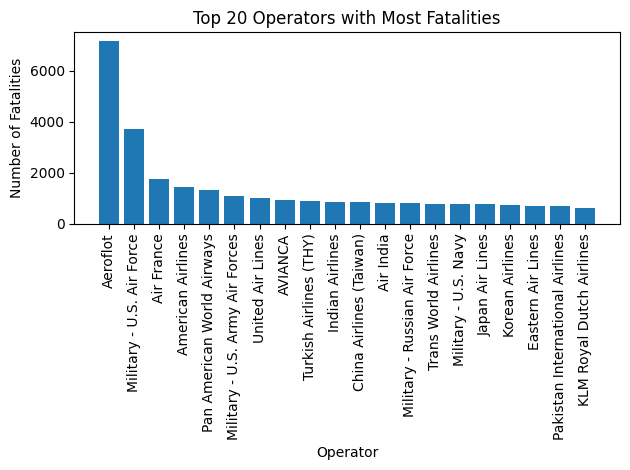

In [ ]:
# Assuming your data is in a pandas dataframe named 'df'
# 1. Get the count of fatalities by operator
operator_fatalities = df.groupby(['Operator'])['Fatalities'].sum()

# 2. Sort the series by fatalities in descending order (highest first)
operator_fatalities_sorted = operator_fatalities.sort_values(ascending=False)

# 3. Select the top 20 operators
top_20_operators_fatalities = operator_fatalities_sorted.head(20)

# 4. Now you can use libraries like matplotlib or seaborn to create a visualization
#    Here's an example bar chart using matplotlib
import matplotlib.pyplot as plt

plt.bar(top_20_operators_fatalities.index, top_20_operators_fatalities.values)
plt.xlabel("Operator")
plt.ylabel("Number of Fatalities")
plt.title("Top 20 Operators with Most Fatalities")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Number Of Ground Fatalities Depends On Operator

In [ ]:
df.groupby(['Operator'])['Ground'].sum()

Operator
A B Aerotransport                0.0
AB Aerotransport                 0.0
ACES Colombia                    0.0
ADC Airlines                     0.0
ADES Colombia                    0.0
                                ... 
Zantop Air Transport             0.0
Zantop Airways                   1.0
Zantop International Airlines    0.0
Zen Nippon                       0.0
de Havilland Aircraft            0.0
Name: Ground, Length: 2476, dtype: float64

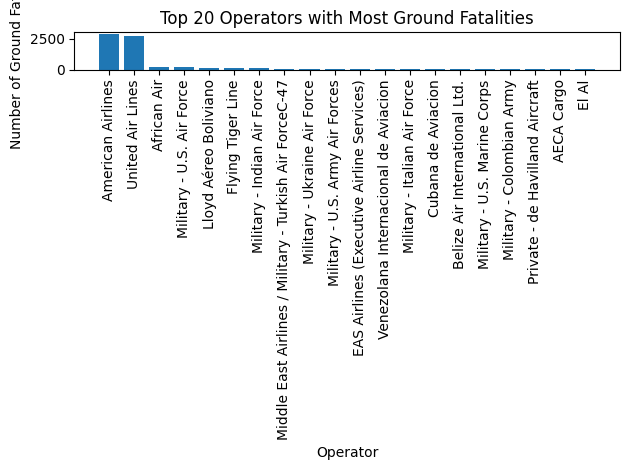

In [ ]:
# Assuming your data is in a pandas dataframe named 'df'
# 1. Get the count of fatalities by operator
operator_fatalities_ground = df.groupby(['Operator'])['Ground'].sum()

# 2. Sort the series by fatalities in descending order (highest first)
operator_fatalities_ground_sorted = operator_fatalities_ground.sort_values(ascending=False)

# 3. Select the top 20 operators
top_20_operators_fatalities_ground = operator_fatalities_ground_sorted.head(20)

# 4. Now you can use libraries like matplotlib or seaborn to create a visualization
#    Here's an example bar chart using matplotlib
import matplotlib.pyplot as plt

plt.bar(top_20_operators_fatalities_ground.index, top_20_operators_fatalities_ground.values)
plt.xlabel("Operator")
plt.ylabel("Number of Ground Fatalities")
plt.title("Top 20 Operators with Most Ground Fatalities")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Number Of Aboard Fatalities Depends On Operator

In [ ]:
df.groupby(['Operator'])['Aboard'].sum()

Operator
A B Aerotransport                 17.0
AB Aerotransport                  64.0
ACES Colombia                     41.0
ADC Airlines                     160.0
ADES Colombia                     23.0
                                 ...  
Zantop Air Transport              13.0
Zantop Airways                     2.0
Zantop International Airlines      4.0
Zen Nippon                         2.0
de Havilland Aircraft             11.0
Name: Aboard, Length: 2476, dtype: float64

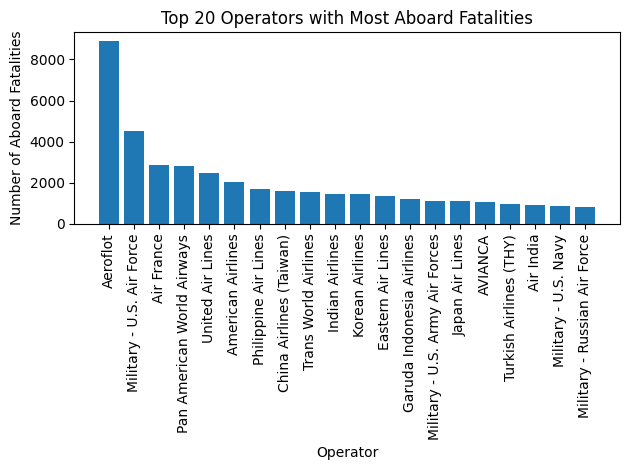

In [ ]:
# Assuming your data is in a pandas dataframe named 'df'
# 1. Get the count of fatalities by operator
operator_fatalities_aboard = df.groupby(['Operator'])['Aboard'].sum()

# 2. Sort the series by fatalities in descending order (highest first)
operator_fatalities_aboard_sorted = operator_fatalities_aboard.sort_values(ascending=False)

# 3. Select the top 20 operators
top_20_operators_fatalities_aboard = operator_fatalities_aboard_sorted.head(20)

# 4. Now you can use libraries like matplotlib or seaborn to create a visualization
#    Here's an example bar chart using matplotlib
import matplotlib.pyplot as plt

plt.bar(top_20_operators_fatalities_aboard.index, top_20_operators_fatalities_aboard.values)
plt.xlabel("Operator")
plt.ylabel("Number of Aboard Fatalities")
plt.title("Top 20 Operators with Most Aboard Fatalities")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# number of flights per Route

In [ ]:
# Count the number of flights for each route
route_counts = df['Route'].value_counts().sort_values(ascending=False)

# Print the route counts
print(route_counts)


Route
Training                       81
Sightseeing                    29
Test flight                    17
Test                            6
Sao Paulo - Rio de Janeiro      5
                               ..
Lilongwe to Rumchi              1
Milwaukee, WI - Detroit, MI     1
Shuttle                         1
La Paz - Sana Cruz              1
Mechuka for Jorhat              1
Name: count, Length: 3243, dtype: int64


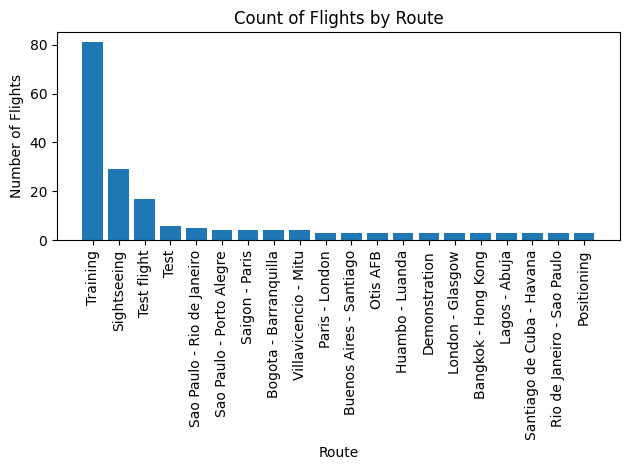

In [ ]:
plt.bar(route_counts[:20].index, route_counts[:20].values)
plt.xlabel("Route")
plt.ylabel("Number of Flights")
plt.title("Count of Flights by Route")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Number of fatalities depends on location

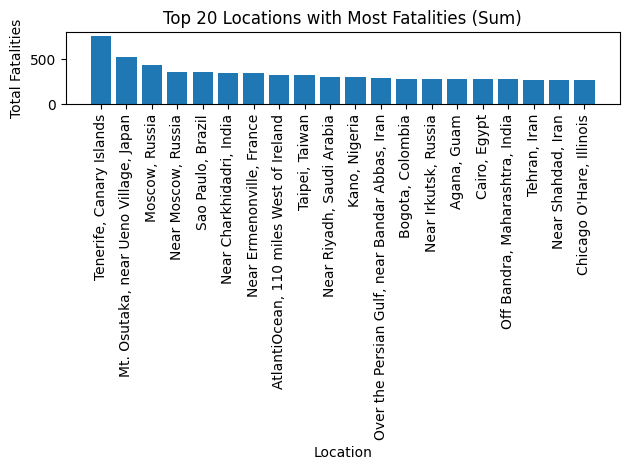

In [ ]:
# 1. Group data by Location and calculate total fatalities
location_fatalities = df.groupby('Location')['Fatalities'].sum()

# 2. Sort data by fatalities in descending order (highest first)
location_fatalities_sorted = location_fatalities.sort_values(ascending=False)

# 3. Select the first 20 rows (top 20 locations with most fatalities)
top_20_locations = location_fatalities_sorted.head(20)

# 4. (Optional) Visualization using a bar chart
import matplotlib.pyplot as plt

plt.bar(top_20_locations.index, top_20_locations.values)
plt.xlabel("Location")
plt.ylabel("Total Fatalities")
plt.title("Top 20 Locations with Most Fatalities (Sum)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Group data by year and calculate sum for Fatalities, Aboard, Ground

In [ ]:
df.groupby('Year')[['Fatalities', 'Aboard', 'Ground']].sum()

,Fatalities,Aboard,Ground
Year,,,
1908,1.0,2.0,0.0
1912,5.0,5.0,0.0
1913,45.0,51.0,0.0
1915,40.0,60.0,0.0
1916,108.0,109.0,0.0
...,...,...,...
2005,1306.0,2164.0,59.0
2006,1136.0,1413.0,4.0
2007,931.0,1364.0,57.0


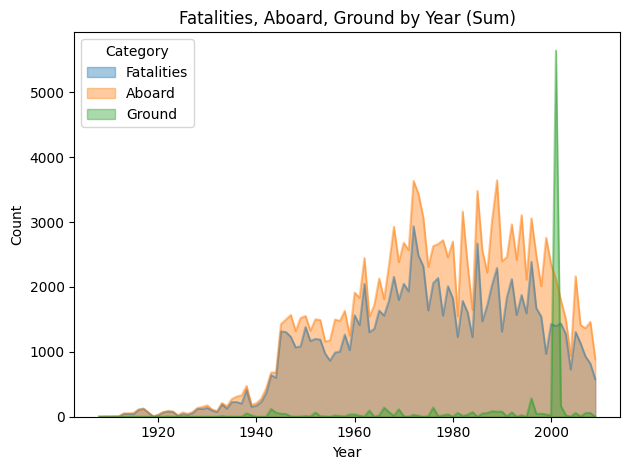

In [ ]:
# 1. Extract the year from the 'Date' column (assuming format MM/DD/YYYY)
df['Year'] = pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.year

# 2. Group data by year and calculate sum for Fatalities, Aboard, Ground
year_summary = df.groupby('Year')[['Fatalities', 'Aboard', 'Ground']].sum()

# 3. Plot the data (using kind='area' for overlapping areas)
year_summary.plot(kind='area', alpha=0.4, stacked=False)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Fatalities, Aboard, Ground by Year (Sum)")
plt.legend(title='Category')  # Add legend
plt.tight_layout()
plt.show()

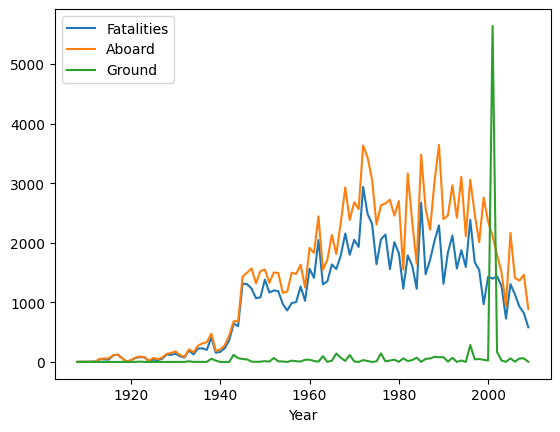

In [ ]:
df.groupby(['Year']).sum()[['Fatalities','Aboard', 'Ground']].plot()
plt.show()

# number of crashes depends of Type

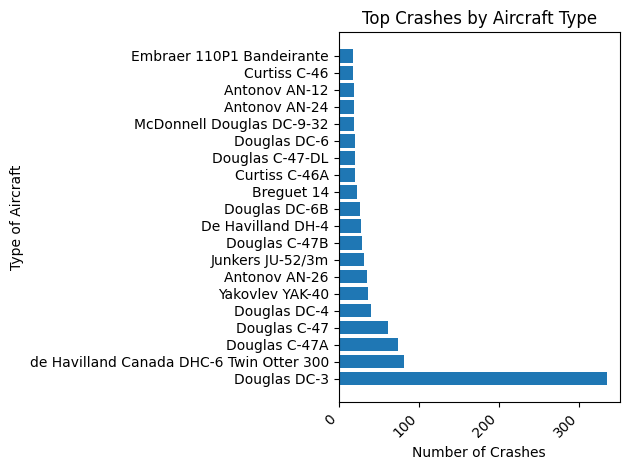

In [ ]:
# 1. Group data by Type and count crashes
type_count = df.groupby(['Type']).count().sort_values('index',ascending=False)

# 2. Select top 20 types (optional)
top_20_types = type_count[:20]

# 3. Plot using pandas plotting (configure aesthetics as desired)
plt.barh(top_20_types.index, top_20_types['index'])
plt.xlabel('Number of Crashes')
plt.ylabel('Type of Aircraft')
plt.title('Top Crashes by Aircraft Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# the end ❤ 🥇